In [13]:
using DataFrames
using CSV
using Statistics
using StatsBase
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
using MLBase


In [55]:
D = DataFrame(CSV.File("C:\\Users\\Hp\\Downloads\\Data_Train.csv"))

Row,Airline,Duration,Price
,String,String,Int64
1,IndiGo,2h 50m,3897
2,Air India,7h 25m,7662
3,Jet Airways,19h,13882
4,IndiGo,5h 25m,6218
5,IndiGo,4h 45m,13302
6,SpiceJet,2h 25m,3873
7,Jet Airways,15h 30m,11087
8,Jet Airways,21h 5m,22270
9,Jet Airways,25h 30m,11087


In [56]:
describe(D)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Airline,,Air Asia,,Vistara Premium economy,0,String
2,Duration,,10h,,9h 5m,0,String
3,Price,9104.72,1759,8372.0,79512,0,Int64


In [62]:
Price= D[!,:Price]

7481-element Vector{Int64}:
  3897
  7662
 13882
  6218
 13302
  3873
 11087
 22270
 11087
  8625
  8907
  4174
  4667
     ⋮
 13587
 13587
 10262
 16439
 14781
 10262
 10844
  4823
  5911
 13377
  6145
  1965

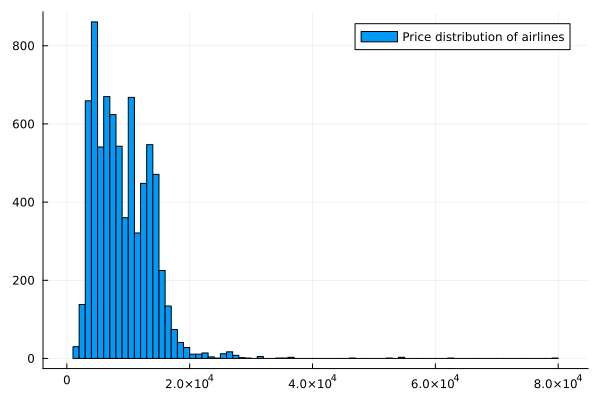

In [95]:


histogram(Price, bins = :sqrt, label = "Price distribution of airlines")


In [89]:
p = kde(Price)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}(-1056.5099725285772:40.73474350027218:82327.50997252858, [5.517995580733774e-10, 6.975203805297136e-10, 8.835920091312787e-10, 1.1194469606318196e-9, 1.4166566440626391e-9, 1.789334793239775e-9, 2.254606933828456e-9, 2.833153264754212e-9, 3.5498325215628415e-9, 4.4343944175494955e-9  …  2.1566581670618576e-10, 1.9489098373930776e-10, 1.834311577363258e-10, 1.814642543285336e-10, 1.8957550977322403e-10, 2.088131298159605e-10, 2.4076026439758726e-10, 2.876262212530813e-10, 3.5236022384329036e-10, 4.387914506450639e-10])

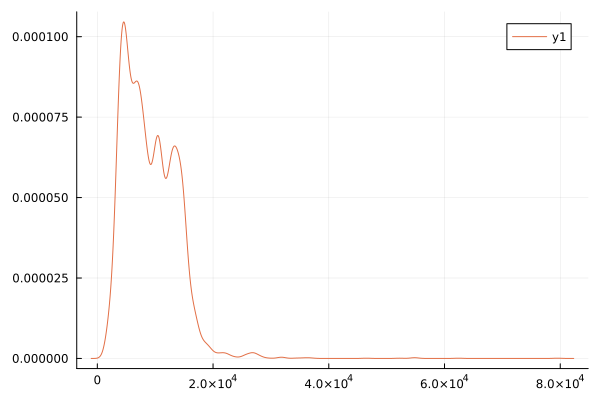

In [93]:
plot(p, color = 2)

In [96]:
OneSampleTTest(Price)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          9104.72
    95% confidence interval: (8999.0, 9210.0)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   7481
    t-statistic:              169.1218455096078
    degrees of freedom:       7480
    empirical standard error: 53.83524238761192


In [177]:
confint(OneSampleTTest(Price))

(8999.183333385554, 9210.247758714431)

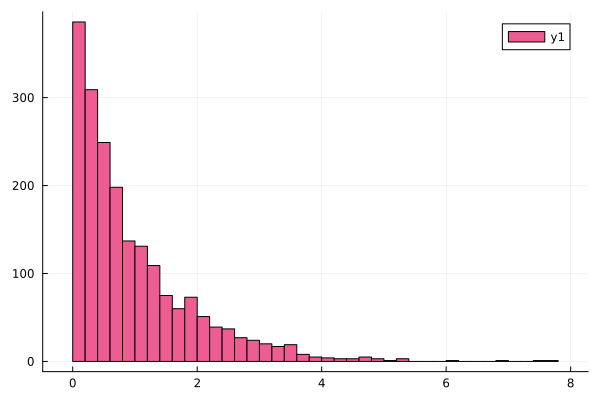

In [170]:
d1 = Weibull()
randvec = rand(d1,2000)
histogram(randvec, color = 7)


In [154]:
d2 = fit(Weibull,Price)

Weibull{Float64}(α=2.0571193228611917, θ=10293.543579539435)

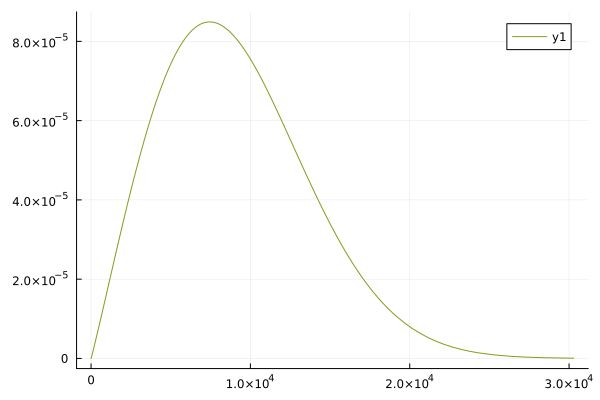

In [165]:
plot(d2, color = 10, fillalpha = 3)

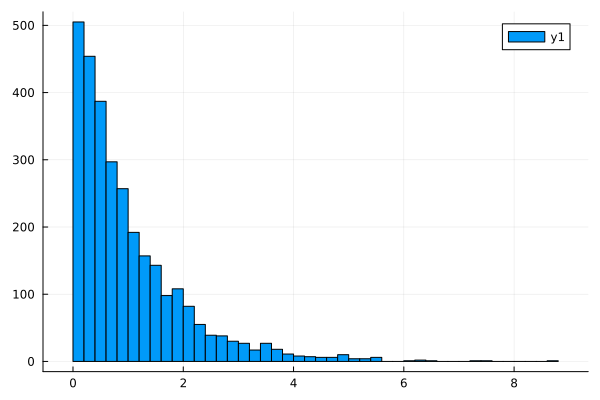

In [172]:
d4 = Exponential()
randvec2 = rand(d4, 3000)
histogram(randvec2)

In [173]:
d5 = fit(Exponential, Price)


Exponential{Float64}(θ=9104.715546049993)

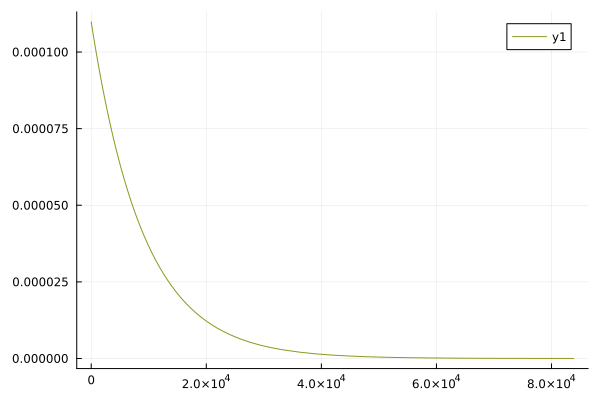

In [174]:
plot(d5, color = 10, fillalpha = 3)